# Generates running team shot/goal differential graphs
Season is 2015 for 2015-16; change as needed. Also change team selection and colors as desired.

### Import

In [1]:
from os import chdir
chdir('/Users/muneebalam/Desktop/Python/PycharmProjects/NHLPbP/')
import PbPMethods2 as pm2
from pylab import *
%matplotlib inline
import GetPbP

### Set season and teams. Also set target filename if you want to save.

In [12]:
season = 2015
metro = False
pac = False
atl = False
cen = False
east = False
west = False
scf = True
fname_sac = None
fname_goals = None
if metro:
    team1 = ('PIT', 'gold')
    team3 = ('NYR', 'b')
    team2 = ('WSH', 'r')
    team4 = ('PHI', 'black')
if pac:
    team4 = ('ANA', 'orange')
    team3 = ('L.A', 'purple')
    team1 = ('S.J', 'teal')
    team2 = ('NSH', 'gold')
if atl:
    team4 = ('FLA', 'firebrick')
    team2 = ('T.B', 'lightblue')
    team3 = ('DET', 'r')
    team1 = ('NYI', 'orange')
if cen:
    team1 = ('DAL', 'limegreen')
    team3 = ('CHI', 'r')
    team2 = ('STL', 'b')
    team4 = ('MIN', 'g')
if east:
    team1 = ('PIT', 'gold')
    team2 = ('T.B', 'lightblue')
    team3 = ('WSH', 'r')
    team4 = ('NYI', 'orange')
if west:
    team1 = ('S.J', 'teal')
    team2 = ('STL', 'b')
    team3 = ('NSH', 'y')
    team4 = ('DAL', 'limegreen')
if scf:
    team1 = ('S.J', 'teal')
    team3 = ('STL', 'b')
    team2 = ('PIT', 'gold')
    team4 = ('T.B', 'k')

### Calculate score-adjusted corsi data for all teams using @IneffectiveMath weights

In [8]:
csaf = {}
csaa = {}
scoreadj = pm2.SCORE_ADJUSTMENTS['micah']
for team in pm2.get_teams(season):
    csaf[team] = []
    csaa[team] = []
    cur_game = 0
    for line in pm2.read_team_corsi(team, season):
        game = int(line[0])
        if not game == cur_game:
            cur_game = game
            csaf[team].append(0)
            csaa[team].append(0)
        thisscore, oppscore = pm2.get_event_score(line)
        scorediff = thisscore - oppscore
        if scorediff < -3:
            scorediff = -3
        elif scorediff > 3:
            scorediff = 3
        coefi = 0
        if line[1][0] == '@':
            coefi = 1
        if pm2.get_acting_team(line) == team:
            csaf[team][-1] += scoreadj[scorediff][coefi]
        else:
            csaa[team][-1] += scoreadj[-1 * scorediff][1 - coefi]
    #print('Done with', team)

### Calculate goal differential data for all teams

In [9]:
gf = {}
ga = {}
for team in pm2.get_teams(season):
    gf[team] = []
    ga[team] = []
    cur_game = 0
    for line in pm2.read_team_pbp(team, season, types=['GOAL'], strengths=['all']):
        game = int(line[0])
        if not game == cur_game:
            cur_game = game
            gf[team].append(0)
            ga[team].append(0)
        if pm2.get_acting_team(line) == team:
            gf[team][-1] += 1
        else:
            ga[team][-1] += 1
    #print('Done with', team)

### Make score-adjusted corsi graph and show
Delete the '#' in front of the appropriate #savefig(fname_sac) to save.

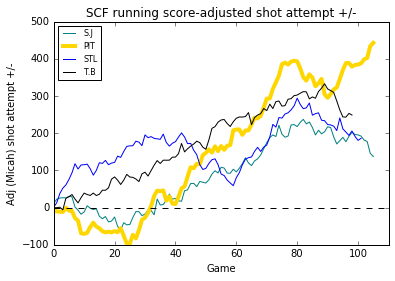

In [11]:
for count, (team, color) in enumerate((team1, team2, team3, team4)):
    cumsd = [csaf[team][0] - csaa[team][0]]
    for i in range(1, len(csaf[team])):
        cumsd.append(csaf[team][i] - csaa[team][i] + cumsd[i - 1])
    lw = 1
    if count == 1:
        lw = 4
    plot(cumsd, color=color, label=team, lw=lw)
xlim(0, 110)
plot([0, 110], [0, 0], color='k', linestyle='--')
legend(loc=2, fontsize=8)
xlabel('Game')
ylabel('Adj (Micah) shot attempt +/-')
if metro:
    title('Metro running score-adjusted shot attempt +/-')
    #savefig(fname_sac)
if atl:
    title('Atlantic running score-adjusted shot attempt +/-')
    #savefig(fname_sac)
if pac:
    title('Pacific running score-adjusted shot attempt +/-')
    #savefig(fname_sac)
if cen:
    title('Central running score-adjusted shot attempt +/-')
    #savefig(fname_sac)
if east:
    title('ECSF running score-adjusted shot attempt +/-')
    #savefig(fname_sac)
if west:
    title('WCSF running score-adjusted shot attempt +/-')
    #savefig(fname_sac)
if scf:
    title('SCF running score-adjusted shot attempt +/-')
    #savefig(fname_sac)

### Make goal differential graph and show
Delete the '#' in front of the appropriate #savefig(fname_goals) to save.

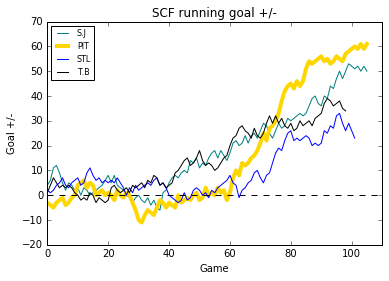

In [13]:
for count, (team, color) in enumerate((team1, team2, team3, team4)):
    cumgd = [gf[team][0] - ga[team][0]]
    for i in range(1, len(gf[team])):
        cumgd.append(gf[team][i] - ga[team][i] + cumgd[i - 1])
    lw = 1
    if count == 1:
        lw = 4
    plot(cumgd, color=color, label=team, lw=lw)
xmin, xmax = xlim()
xlim(0, 110)
plot([xmin, xmax], [0, 0], color='k', linestyle='--')
legend(loc=2, fontsize=8)
xlabel('Game')
ylabel('Goal +/-')
if metro:
    title('Metro running goal +/-')
    #savefig(fname_goals)
if atl:
    title('Atlantic running goal +/-')
    #savefig(fname_goals)
if pac:
    title('Pacific running goal +/-')
    #savefig(fname_goals)
if cen:
    title('Central running goal +/-')
    #savefig(fname_goals)
if east:
    title('ECSF running goal +/-')
    #savefig(fname_goals)
if west:
    title('WCSF running goal +/-')
    #savefig(fname_goals)
if scf:
    title('SCF running goal +/-')
    #savefig(fname_goals)